In [1]:
pip install -r requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import math
import os
import pandas as pd
import torch
from omegaconf import OmegaConf

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Read pickles from the path specified in config.dest_file
config_path = "config_work.yaml"  # Replace with the path to your config file
config = OmegaConf.load(config_path)
df_encoded_path = os.path.join(config.dest_file, "df_encoded.csv")
# Load the DataFrame from the CSV file
df = pd.read_csv(df_encoded_path)

In [5]:
df.head(-5)

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalTransportationPercentage,percentageAircraft,percentageLorry,percentageTrain,percentageShip,totalDistance,transportCost,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nAnniProduzione,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,cycleTime,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,memtiEngineValue,steelPrice,runnersType,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,gateDiameter,setupTime,warmupTime,deliveryVolume,deliveryPeriod,mouldDesignCostDisplay,mouldTotalCost,Cost,human health - photochemical oxidation,ecosystem quality - terrestrial ecotoxicity,resources - mineral extraction,resources - non-renewable energy,ecosystem quality - terrestrial acidification & nutrification,resources - total,human health - ionising radiation,human health - respiratory effects (inorganics),human health - total,human health - human toxicity,ecosystem quality - aquatic ecotoxicity,climate change - climate change,human health - ozone layer depletion,ecosystem quality - land occupation,climate change - total,ecosystem quality - total
0,3.0,1.0,40000.0,40000.0,1500.0,40.0,65.0,0.20,6.6725,0.0,0.5,32.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,56093.360588,0.000005,0.000885,0.000019,0.001452,0.000023,0.001471,0.000599,0.002724,0.004244,0.000916,0.000017,0.001938,1.483623e-07,0.000036,0.001938,0.000961
1,3.0,1.0,40000.0,25000.0,3000.0,70.0,50.0,0.15,6.6725,0.0,0.5,16.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,43493.360588,0.000004,0.000805,0.000018,0.001366,0.000022,0.001384,0.000567,0.002586,0.004010,0.000853,0.000016,0.001825,1.379114e-07,0.000032,0.001825,0.000874
2,3.0,0.0,40000.0,40000.0,4500.0,100.0,65.0,0.20,6.6725,0.0,0.3,32.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,102993.360588,0.000005,0.000885,0.000019,0.001452,0.000023,0.001470,0.000599,0.002723,0.004243,0.000916,0.000017,0.001938,1.483223e-07,0.000036,0.001938,0.000960
3,3.0,1.0,10000.0,25000.0,4500.0,70.0,50.0,0.18,6.6725,0.0,0.5,32.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,44993.360588,0.000004,0.000853,0.000018,0.001414,0.000022,0.001432,0.000584,0.002666,0.004146,0.000891,0.000017,0.001891,1.439857e-07,0.000034,0.001891,0.000926
4,3.0,0.0,25000.0,25000.0,3000.0,40.0,65.0,0.18,6.6725,0.0,0.3,32.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,67593.360588,0.000004,0.000852,0.000018,0.001414,0.000022,0.001432,0.000584,0.002666,0.004145,0.000890,0.000017,0.001890,1.439457e-07,0.000034,0.001890,0.000925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164138,2.0,0.0,40000.0,25000.0,1500.0,40.0,50.0,0.15,6.6725,3.0,0.3,1.0,0.005495,6.677995,100.0,5.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164148 entries, 0 to 164147
Data columns (total 70 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   surfaceProcessingLocationCavity                                164148 non-null  float64
 1   hotRunner                                                      164148 non-null  float64
 2   hotRunnerCost                                                  164148 non-null  float64
 3   manufacturingCost                                              164148 non-null  float64
 4   mouldValidationCost                                            164148 non-null  float64
 5   designTime                                                     164148 non-null  float64
 6   hourlyDesignCost                                               164148 non-null  float64
 7   removedChassis                                 

In [7]:
df.describe()

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalTransportationPercentage,percentageAircraft,percentageLorry,percentageTrain,percentageShip,totalDistance,transportCost,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nAnniProduzione,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,cycleTime,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,memtiEngineValue,steelPrice,runnersType,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,gateDiameter,setupTime,warmupTime,deliveryVolume,deliveryPeriod,mouldDesignCostDisplay,mouldTotalCost,Cost,human health - photochemical oxidation,ecosystem quality - terrestrial ecotoxicity,resources - mineral extraction,resources - non-renewable energy,ecosystem quality - terrestrial acidification & nutrification,resources - total,human health - ionising radiation,human health - respiratory effects (inorganics),human health - total,human health - human toxicity,ecosystem quality - aquatic ecotoxicity,climate change - climate change,human health - ozone layer depletion,ecosystem quality - land occupation,climate change - total,ecosystem quality - total
count,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,1.641480e+05,164148.000000,164148.000000,164148.000000,1.641480e+05,1.641480e+05,164148.0,164148.0,164148.0,164148.0,164148.0,164148.000000,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.0,164148.000000,164148.0,164148.000000,164148.000000,164148.00000,164148.000000,164148.0,164148.000000,164148.0,164148.000000,164148.000000,164148.0,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,1.641480e+05,164148.000000,164148.000000,164148.000000
mean,3.000000,0.195409,15862.270634,36722.073982,1606.586739,51.724541,50.532934,0.163086,6.672500e+00,0.769793,0.308290,2.740917,5.495000e-03,6.677995e+00,100.0,5.0,25.0,40.0,30.0,1133.808514,4000.0,3.455528,2.275922,0.461194,19.336300,1.319736,9.781782,0.319078,1.0,5381.814874,0.001102,0.147477,0.174690,360.0,14.347540,10185.344933,21.585642,3.501060,2.076979,0.0,0.426347,1.0,5.818901,9.061274,5.43275,4.115469,1.0,41.896764,30.0,6594.545654,3.644126,2000.0,38500.0,66584.271435,0.000040,0.003328,0.000024,0.030269,0.000185,0.030294,0.006191,0.014077,0.023236,0.002927,0.000106,0.019277,1.373095e-06,0.000173,0.019277,0.003792
std,0.554905,0.396516,10592.036270,12479.432960,505.081843,21.184073,2.776695,0.024592,7.269763e-12,1.186966,0.037572,6.279052,3.367976e-15,1.328275e-11,0.0,0.0,0.0,0.0,0.0,2229.091505,0.0,1.700838,2.623105,0.498493,29.477817,0.732969,9.831097,0.466121,0.0,15494.806796,0.000140,0.681254,0.768119,0.0,11.216855,6239.503454,11.208630,1.647026,0.525674,0.0,1.047509,0.0,1.404725,4.282591,3.29176,0.933774,0.0,38.959314,0.0,16912.852510,4.686030,0.0,0.0,15482.078690,0.000101,0.005769,0.000017,0.080793,0.000451,0.080809,0.015016,0.031402,0.051850,0.005354,0.000233,0.048485,3.047302e-06,0.000378,0.048485,0.006825
min,2.000000,0.000000,10000.000000,25000.000000,1500.000000,40.000000,50.000000,0.150000,6.672500e+00,0.000000,0.300000,1.000000,5.495000e-03,6.677995e+00,100.0,5.0,25.0,40.0,30.0,50.000000,4000.0,0.000000,1.000000,0.000000,5.000000,1.000000,5.000000,0.000000,1.0,1.000000,0.000920,0.000000,0.000000,360.0,10.000000,8000.000000,12.000000,0.000000,1.000000,0.0,0.000000,1.0,2.000000,2.000000,0.00

In [8]:
df.columns

Index(['surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
       'manufacturingCost', 'mouldValidationCost', 'designTime',
       'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
       'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
       'weightCavityProcessed', 'weightMould', 'totalTransportationPercentage',
       'percentageAircraft', 'percentageLorry', 'percentageTrain',
       'percentageShip', 'totalDistance', 'transportCost',
       'injectedMaterial_product', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
       'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
       'machineCycleTime', 'maintenanceCost', 'productionCost',
       'injectedMaterial_materozza', 'injectionMouldingProcess',
       'memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
       'machineName',

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge

In [10]:
df_corr = df.corr()

In [11]:
#['surfaceProcessingLocationCavity', 'surfaceProcessingLocationChassis', 'injectedMaterial_product', 'injectedMaterial_materozza', 'injectionMouldingProcess','memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName','machineName', 'EUUSMacchina', 'CNMacchina']

In [12]:
df.shape

(164148, 70)

In [13]:
df_corr[df_corr.columns] = df_corr[df_corr.columns].astype(float)

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [15]:
scaler = MinMaxScaler()
scalerStd = StandardScaler()

In [20]:
# scaling the data
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

In [ ]:
#df_scaled.to_csv('df_scaled.csv', index=False)

In [19]:
df_scaled=pd.read_csv('df_scaled.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'df_scaled.csv'

In [ ]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns, index=df_scaled.index)

In [21]:
df_scaled = pd.DataFrame(scalerStd.fit_transform(df_scaled), columns=df_scaled.columns, index=df_scaled.index)

In [ ]:
import dcor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Function to compute distance correlation for a pair of columns
def compute_distance_correlation(col1, col2):
    return dcor.distance_correlation(col1, col2)

# Function to calculate distance correlation matrix using parallel processing
def distance_correlation_matrix_parallel(df, n_jobs=-1):
    num_vars = df.shape[1]
    corr_matrix = np.zeros((num_vars, num_vars))
    
    results = Parallel(n_jobs=n_jobs)(
        delayed(compute_distance_correlation)(df.iloc[:, i].values, df.iloc[:, j].values)
        for i in range(num_vars) for j in range(num_vars)
    )
    
    # Fill the correlation matrix
    for idx, (i, j) in enumerate([(i, j) for i in range(num_vars) for j in range(num_vars)]):
        corr_matrix[i, j] = results[idx]
    
    return corr_matrix

# Function to filter variables by distance correlation threshold
def filter_variables_by_distance_correlation_parallel(df, threshold=0.43, n_jobs=-1):
    corr_matrix = distance_correlation_matrix_parallel(df, n_jobs=n_jobs)
    filtered_corr_matrix = np.where(corr_matrix >= threshold, corr_matrix, 0)
    filtered_corr_df = pd.DataFrame(filtered_corr_matrix, index=df.columns, columns=df.columns)
    return filtered_corr_df


In [31]:
import dcor
import numpy as np
import pandas as pd
from joblib import Parallel, delayed

# Function to compute distance correlation for a pair of columns
def compute_distance_correlation(col1, col2):
    dc = dcor.distance_correlation(col1, col2)
    return min(max(dc, 0.0), 1.0)  # clamp to [0,1] for numerical safety

# Function to calculate distance correlation matrix with categorical handling
def distance_correlation_matrix_parallel(df, n_jobs=-1):
    # One-hot encode categorical variables
    df_encoded = pd.get_dummies(df, drop_first=False)
    
    num_vars = df_encoded.shape[1]
    corr_matrix = np.zeros((num_vars, num_vars))
    
    results = Parallel(n_jobs=n_jobs)(
        delayed(compute_distance_correlation)(df_encoded.iloc[:, i].values, df_encoded.iloc[:, j].values)
        for i in range(num_vars) for j in range(num_vars)
    )
    
    # Fill the correlation matrix
    for idx, (i, j) in enumerate([(i, j) for i in range(num_vars) for j in range(num_vars)]):
        corr_matrix[i, j] = results[idx]
    
    return pd.DataFrame(corr_matrix, index=df_encoded.columns, columns=df_encoded.columns)
# Function to filter variables by distance correlation threshold
def filter_variables_by_distance_correlation_parallel(df, threshold=0.43, n_jobs=-1):
    corr_df = distance_correlation_matrix_parallel(df, n_jobs=n_jobs)
    filtered_corr_df = corr_df.where(corr_df >= threshold, 0)
    return filtered_corr_df

def plot_and_save_corr(filtered_corr_df, filter_threshold, dest_file):
        # Plot the filtered heatmap
    filtered_corr_df = filtered_corr_df.loc[(filtered_corr_df != filter_threshold).any(axis=1), (filtered_corr_df != filter_threshold).any(axis=0)]
    plt.figure(figsize=(50, 30))
    sns.heatmap(filtered_corr_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title(f"Filtered Distance Correlation Heatmap (Threshold ≥ {filter_threshold})")
    #save 
    plt.savefig(os.path.join(config.dest_file, f"corr_graph_{filter_threshold}.png"))
    plt.show()



In [ ]:
filtered_corr_df_one_hot = filter_variables_by_distance_correlation_parallel(df, threshold=0, n_jobs=-1)
filtered_corr_df_one_hot_path = os.path.join(config.dest_file, "df_filtered_one_hot.csv")
filtered_corr_df_one_hot.to_csv(filtered_corr_df_one_hot_path)

In [ ]:
filtered_corr_df= filtered_corr_df_one_hot

In [36]:
filtered_corr_df_one_hot_path = os.path.join(config.dest_file, "df_filtered_one_hot.csv")

filtered_corr_df = pd.read_csv(filtered_corr_df_one_hot_path)

In [34]:
# Remove rows and columns that are all zeros (no significant correlations)
filtered_corr_df = filtered_corr_df.loc[(filtered_corr_df != 0).any(axis=1), (filtered_corr_df != 0).any(axis=0)]

In [35]:
plot_and_save_corr(filtered_corr_df, 0, config.dest_file)

ValueError: could not convert string to float: 'surfaceProcessingLocationCavity'

<Figure size 5000x3000 with 0 Axes>

In [38]:
feature_column = ['surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
       'manufacturingCost', 'mouldValidationCost', 'designTime',
       'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
       'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
       'weightCavityProcessed', 'weightMould', 'totalTransportationPercentage',
       'percentageAircraft', 'percentageLorry', 'percentageTrain',
       'percentageShip', 'totalDistance', 'transportCost',
       'injectedMaterial_product', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
       'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
       'machineCycleTime', 'maintenanceCost', 'productionCost',
       'injectedMaterial_materozza', 'injectionMouldingProcess',
       'memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
       'machineName', 'EUUSMacchina', 'CNMacchina', 'gateDiameter',
       'setupTime', 'warmupTime', 'deliveryVolume', 'deliveryPeriod',
       'mouldDesignCostDisplay', 'mouldTotalCost']

target_column = ['Cost',
       'human health - photochemical oxidation',
       'ecosystem quality - terrestrial ecotoxicity',
       'resources - mineral extraction', 'resources - non-renewable energy',
       'ecosystem quality - terrestrial acidification & nutrification',
       'resources - total', 'human health - ionising radiation',
       'human health - respiratory effects (inorganics)',
       'human health - total', 'human health - human toxicity',
       'ecosystem quality - aquatic ecotoxicity',
       'climate change - climate change',
       'human health - ozone layer depletion',
       'ecosystem quality - land occupation', 'climate change - total',
       'ecosystem quality - total']

We will divide the columns into features and target. and delete the highly correlated ones. 

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store filtered correlations
filtered_correlations = {}

# Assuming target is a DataFrame with multiple columns
for column in target.columns:
    # Calculate correlation with the specific target variable
    corr_with_target = features.corrwith(target[column])
    
    # Filter correlations: keep only those >= 0.1 or <= -0.1
    filtered_corr = corr_with_target[(corr_with_target >= 0.1) | (corr_with_target <= -0.1)]
    
    # Store the filtered correlations in a dictionary
    filtered_correlations[column] = filtered_corr
    
    # Sort the filtered correlations
    filtered_corr = filtered_corr.sort_values(ascending=False)
    
    # Check if there are any correlations to plot
    if not filtered_corr.empty:
        # Plot the heatmap for this target variable
        plt.figure(figsize=(4, 8))
        sns.heatmap(filtered_corr.to_frame(), cmap='GnBu', annot=True)
        plt.title(f'Correlation with Target Variable: {column}')
        plt.show()
    else:
        print(f"No features with correlation >= 0.1 or <= -0.1 for {column}")

# After loop, you can access filtered_correlations for each target variable


NameError: name 'target' is not defined

In [ ]:
filtered_corr_df.columns

Index(['surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
       'manufacturingCost', 'mouldValidationCost', 'designTime',
       'hourlyDesignCost', 'removedChassis',
       'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
       'totalDistance', 'injectedMaterial_product', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nProdottiAnno', 'materialDensity',
       'tolerance', 'surfaceFinishing', 'machineCycleTime', 'maintenanceCost',
       'productionCost', 'injectedMaterial_materozza',
       'injectionMouldingProcess', 'steelPrice', 'mouldMaterialName',
       'machineName', 'EUUSMacchina', 'CNMacchina', 'setupTime',
       'deliveryVolume', 'deliveryPeriod', 'Cost',
       'human health - photochemical oxidation',
       'ecosystem quality - terrestrial ecotoxicity',
       'resources - mineral extraction', 'resources - non-renewable energy',
       'ecosys

In [40]:
# Find non-numeric columns
non_numeric_columns = filtered_corr_df.select_dtypes(exclude=[float, int]).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Unnamed: 0'], dtype='object')


In [41]:
#df_scaled= pd.read_csv('out11.csv')

In [42]:
input_variables= ['surfaceProcessingLocationCavity', 'hotRunner',
'hotRunnerCost','manufacturingCost', 'mouldValidationCost',
'designTime','hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
'weightCavityProcessed', 'weightMould',
'totalTransportationPercentage','percentageAircraft', 'percentageLorry', 'percentageTrain','percentageShip', 'totalDistance',
'injectedMaterial_product', 'injectedMaterialCost','percentageRecycledMaterial', 'maxDepth', 'maxWallThickness','productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
 'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
'machineCycleTime',
'maintenanceCost', 'productionCost','transportCost', 'mouldTotalCost',
'injectedMaterial_materozza', 'injectionMouldingProcess','memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
'machineName', 'EUUSMacchina', 'CNMacchina', 'gateDiameter', 'setupTime', 'warmupTime', 'deliveryVolume', 'deliveryPeriod','mouldDesignCostDisplay']

output_variables= ['human health - total', 
                   'ecosystem quality - total',
                    'resources - total', 
                      'Cost'
                      ]

In [43]:
input_variables

['surfaceProcessingLocationCavity',
 'hotRunner',
 'hotRunnerCost',
 'manufacturingCost',
 'mouldValidationCost',
 'designTime',
 'hourlyDesignCost',
 'removedChassis',
 'weightChassisProcessed',
 'surfaceProcessingLocationChassis',
 'removedCavity',
 'numberOfCavities',
 'weightCavityProcessed',
 'weightMould',
 'totalTransportationPercentage',
 'percentageAircraft',
 'percentageLorry',
 'percentageTrain',
 'percentageShip',
 'totalDistance',
 'injectedMaterial_product',
 'injectedMaterialCost',
 'percentageRecycledMaterial',
 'maxDepth',
 'maxWallThickness',
 'productVolume',
 'materozzaVolume',
 'nAnniProduzione',
 'nProdottiAnno',
 'materialDensity',
 'tolerance',
 'surfaceFinishing',
 'cycleTime',
 'machineCycleTime',
 'maintenanceCost',
 'productionCost',
 'transportCost',
 'mouldTotalCost',
 'injectedMaterial_materozza',
 'injectionMouldingProcess',
 'memtiEngineValue',
 'steelPrice',
 'runnersType',
 'mouldMaterialName',
 'machineName',
 'EUUSMacchina',
 'CNMacchina',
 'gateDia

In [44]:
selected_features= selected_features = filtered_corr_df.columns.intersection(input_variables)
selected_outputs = filtered_corr_df.columns.intersection(output_variables)

print(selected_features)
print(selected_outputs)

Index(['surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
       'manufacturingCost', 'mouldValidationCost', 'designTime',
       'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
       'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
       'weightCavityProcessed', 'weightMould', 'totalTransportationPercentage',
       'percentageAircraft', 'percentageLorry', 'percentageTrain',
       'percentageShip', 'totalDistance', 'transportCost',
       'injectedMaterial_product', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
       'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
       'machineCycleTime', 'maintenanceCost', 'productionCost',
       'injectedMaterial_materozza', 'injectionMouldingProcess',
       'memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
       'machineName',

In [45]:
features=df_scaled[selected_features]
target= df_scaled[selected_outputs]

In [46]:
target

,Cost,resources - total,human health - total,ecosystem quality - total
0,-0.677618,-0.356677,-0.366296,-0.414860
1,-1.491465,-0.357757,-0.370803,-0.427560
2,2.351700,-0.356681,-0.366314,-0.414903
3,-1.394579,-0.357152,-0.368183,-0.419983
4,0.065178,-0.357156,-0.368201,-0.420027
...,...,...,...,...
164143,-1.491461,-0.342396,-0.339080,-0.405195
164144,-0.070462,-0.331692,-0.319387,-0.401411
164145,1.092176,-0.342747,-0.327733,-0.118626
164146,0.349379,-0.354859,-0.358487,-0.240271


In [47]:
features

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalTransportationPercentage,percentageAircraft,percentageLorry,percentageTrain,percentageShip,totalDistance,transportCost,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nAnniProduzione,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,cycleTime,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,memtiEngineValue,steelPrice,runnersType,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,gateDiameter,setupTime,warmupTime,deliveryVolume,deliveryPeriod,mouldDesignCostDisplay,mouldTotalCost
0,0.000000,2.029155,2.278863,0.262667,-0.211029,-0.553462,5.210191,1.501052,0.0,-0.648540,5.102484,4.659807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,-0.855205,-0.304222,-0.146440,0.0,-0.407011,0.0,0.128922,-0.481316,-0.435255,-0.123659,0.0,-0.690383,0.0,-0.389323,-0.350858,0.0,0.0
1,0.000000,2.029155,2.278863,-0.939314,2.758795,0.862701,-0.191932,-0.532149,0.0,-0.648540,5.102484,2.111644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,-0.855205,-0.304222,-0.146440,0.0,-0.407011,0.0,0.128922,-0.481316,-0.435255,-0.123659,0.0,-0.690383,0.0,-0.389323,-0.350858,0.0,0.0
2,0.000000,-0.492816,2.278863,0.262667,5.728620,2.278863,5.210191,1.501052,0.0,-0.648540,-0.220646,4.659807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,-0.855205,-0.304222,-0.146440,0.0,-0.407011,0.0,0.128922,-0.481316,-0.435255,-0.123659,0.0,-0.690383,0.0,-0.389323,-0.350858,0.0,0.0
3,0.000000,2.029155,-0.553462,-0.939314,5.728620,0.862701,-0.191932,0.687772,0.0,-0.648540,5.102484,4.659807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,-0.855205,-0.304222,-0.146440,0.0,-0.407011,0.0,0.128922,-0.481316,-0.435255,-0.123659,0.0,-0.690383,0.0,-0.389323,-0.350858,0.0,0.0
4,0.000000,-0.492816,0.862701,-0.939314,2.758795,-0.553462,5.210191,0.687772,0.0,-0.648540,-0.220646,4.659807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,-0.855205,-0.304222,-0.146440,0.0,-0.407011,0.0,0.128922,-0.481316,-0.435255,-0.123659,0.0,-0.690383,0.0,-0.389323,-0.350858,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164143,0.000000,2.029155,-0.553462,-0.939314,-0.211029,2.278863,-0.191932,0.687772,0.0,-0.648540,-0.220646,-0.277259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,1.464444,-0.304222,1.755885,0.0,-0.407011,0.0,0.128922,2.087230,2.298854,-0.123659,0.0,0.593011,0.0,-0.389323,-0.350858,0.0,0.0
164144,0.000000,-0.492816,-0.553462,0.262667,-0.211029,-0.553462,-0.191932,-0.532149,0.0,-0.648540,-0.220646,-0.277259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,-0.141467,-0.304222,1.755885,0.0,-0.407011,0.0,0.128922,1.62

In [48]:
df_selected = pd.concat([features, target], axis=1)

In [49]:
df_selected.head()

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalTransportationPercentage,percentageAircraft,percentageLorry,percentageTrain,percentageShip,totalDistance,transportCost,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nAnniProduzione,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,cycleTime,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,memtiEngineValue,steelPrice,runnersType,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,gateDiameter,setupTime,warmupTime,deliveryVolume,deliveryPeriod,mouldDesignCostDisplay,mouldTotalCost,Cost,resources - total,human health - total,ecosystem quality - total
0,0.0,2.029155,2.278863,0.262667,-0.211029,-0.553462,5.210191,1.501052,0.0,-0.64854,5.102484,4.659807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,0.0,-0.407011,0.0,0.128922,-0.481316,-0.435255,-0.123659,0.0,-0.690383,0.0,-0.389323,-0.350858,0.0,0.0,-0.677618,-0.356677,-0.366296,-0.414860
1,0.0,2.029155,2.278863,-0.939314,2.758795,0.862701,-0.191932,-0.532149,0.0,-0.64854,5.102484,2.111644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,0.0,-0.407011,0.0,0.128922,-0.481316,-0.435255,-0.123659,0.0,-0.690383,0.0,-0.389323,-0.350858,0.0,0.0,-1.491465,-0.357757,-0.370803,-0.427560
2,0.0,-0.492816,2.278863,0.262667,5.728620,2.278863,5.210191,1.501052,0.0,-0.64854,-0.220646,4.659807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,0.0,-0.407011,0.0,0.128922,-0.481316,-0.435255,-0.123659,0.0,-0.690383,0.0,-0.389323,-0.350858,0.0,0.0,2.351700,-0.356681,-0.366314,-0.414903
3,0.0,2.029155,-0.553462,-0.939314,5.728620,0.862701,-0.191932,0.687772,0.0,-0.64854,5.102484,4.659807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,0.0,-0.407011,0.0,0.128922,-0.481316,-0.435255,-0.123659,0.0,-0.690383,0.0,-0.389323,-0.350858,0.0,0.0,-1.394579,-0.357152,-0.368183,-0.419983
4,0.0,-0.492816,0.862701,-0.939314,2.758795,-0.553462,5.210191,0.687772,0.0,-0.64854,-0.220646,4.659807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,0.0,-0.407011,0.0,0.128922,-0.481316,-0.435255,-0.123659,0.0,-0.690383,0.0,-0.389323,-0.350858,0.0,0.0,0.065178,-0.357156,-0.368201,-0.420027


c:\Users\ext.saad.hussainshaf\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ext.saad.hussainshaf\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


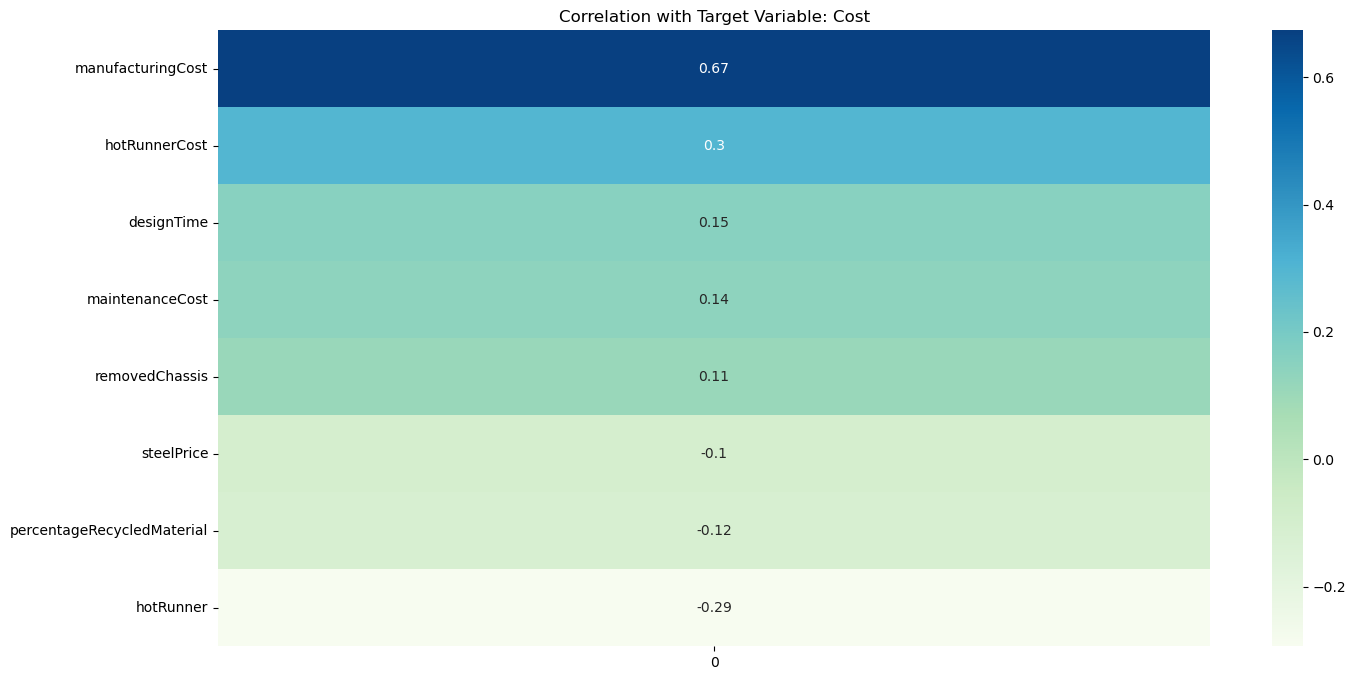

c:\Users\ext.saad.hussainshaf\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ext.saad.hussainshaf\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


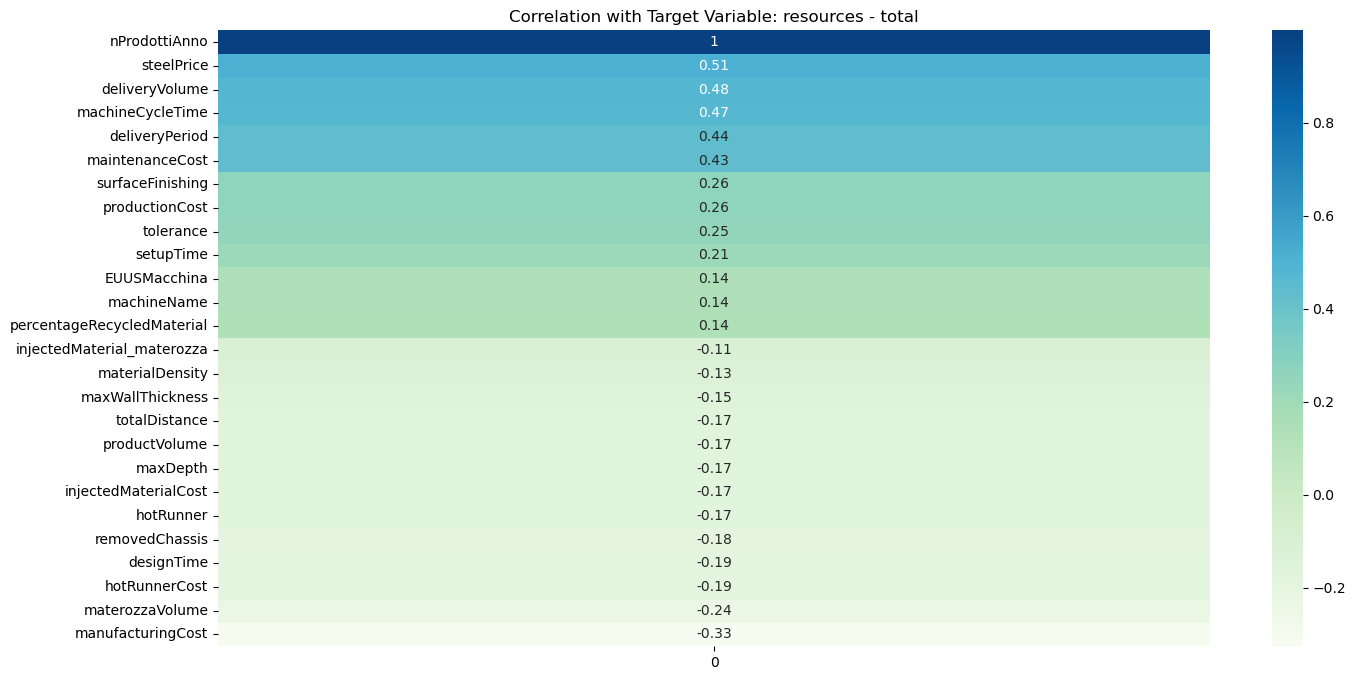

c:\Users\ext.saad.hussainshaf\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ext.saad.hussainshaf\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


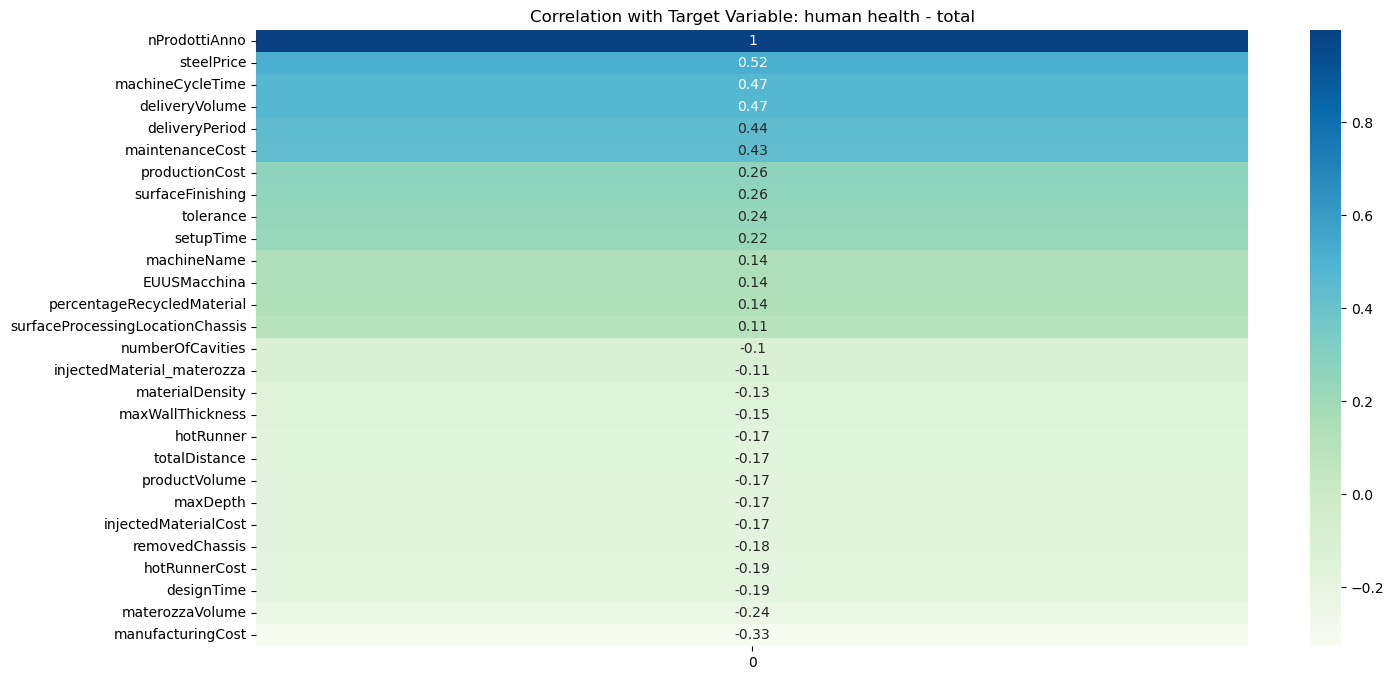

c:\Users\ext.saad.hussainshaf\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ext.saad.hussainshaf\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


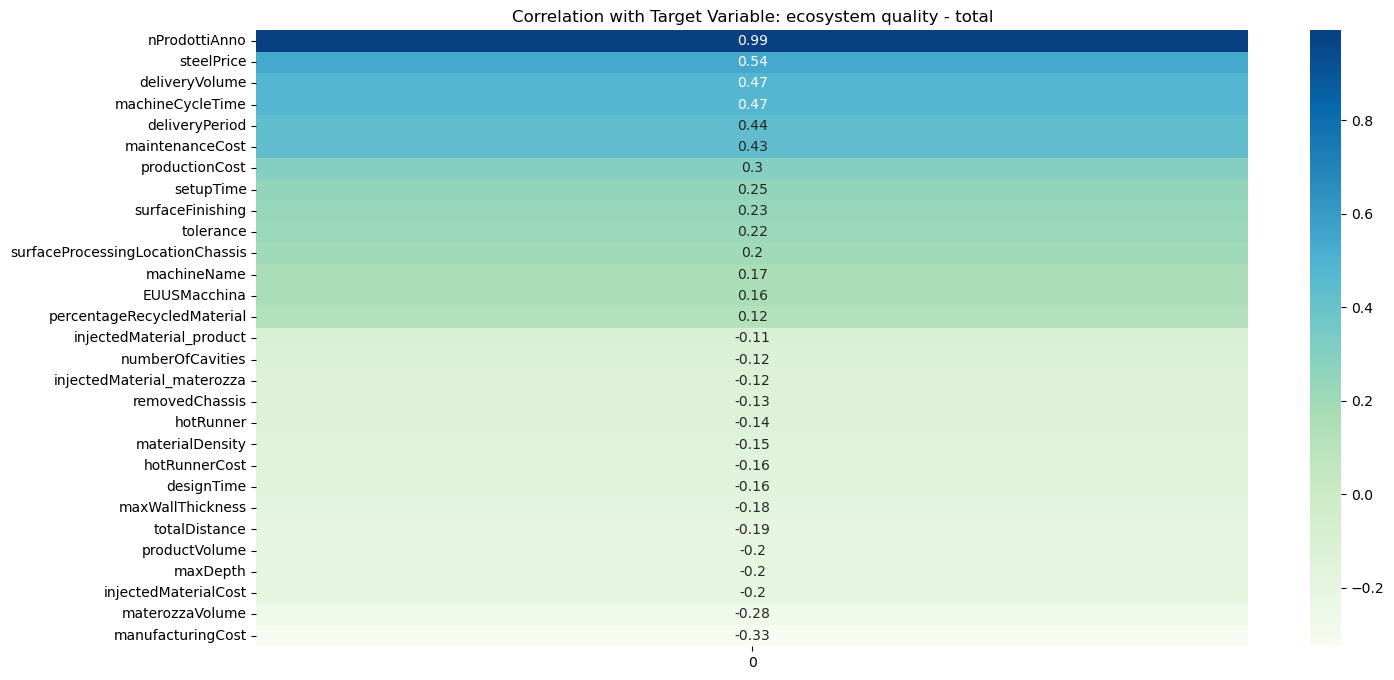

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Dictionary to store filtered correlations
filtered_correlations = {}

# Assuming target is a DataFrame with multiple columns
for column in target.columns:
    # Calculate correlation with the specific target variable
    corr_with_target = features.corrwith(target[column])
    
    # Filter correlations: keep only those >= 0.1 or <= -0.1
    filtered_corr = corr_with_target[(corr_with_target >= 0.1) | (corr_with_target <= -0.1)]
    
    # Store the filtered correlations in a dictionary
    filtered_correlations[column] = filtered_corr
    
    # Sort the filtered correlations
    filtered_corr = filtered_corr.sort_values(ascending=False)
    
    # Check if there are any correlations to plot
    if not filtered_corr.empty:
        # Plot the heatmap for this target variable
        plt.figure(figsize=(16, 8))
        sns.heatmap(filtered_corr.to_frame(), cmap='GnBu', annot=True)
        plt.title(f'Correlation with Target Variable: {column}')
        plt.savefig(os.path.join(config.dest_file, f"corr_with_{column}.png"))
        plt.show()
    else:
        print(f"No features with correlation >= 0.1 or <= -0.1 for {column}")

# After loop, you can access filtered_correlations for each target variable


In [51]:
filtered_corr_df.head(2)

,Unnamed: 0,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalTransportationPercentage,percentageAircraft,percentageLorry,percentageTrain,percentageShip,totalDistance,transportCost,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nAnniProduzione,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,cycleTime,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,memtiEngineValue,steelPrice,runnersType,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,gateDiameter,setupTime,warmupTime,deliveryVolume,deliveryPeriod,mouldDesignCostDisplay,mouldTotalCost,Cost,human health - photochemical oxidation,ecosystem quality - terrestrial ecotoxicity,resources - mineral extraction,resources - non-renewable energy,ecosystem quality - terrestrial acidification & nutrification,resources - total,human health - ionising radiation,human health - respiratory effects (inorganics),human health - total,human health - human toxicity,ecosystem quality - aquatic ecotoxicity,climate change - climate change,human health - ozone layer depletion,ecosystem quality - land occupation,climate change - total,ecosystem quality - total
0,surfaceProcessingLocationCavity,1.000000,0.191297,0.221012,0.055549,0.108879,0.221012,0.096577,0.230721,0.0,0.824925,0.111683,0.146933,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.251479,0.0,0.259865,0.251587,0.154946,0.251601,0.219499,0.251603,0.344450,0.0,0.075064,0.264585,0.111935,0.115151,0.0,0.083037,0.071901,0.381401,0.258050,0.289325,0.0,0.238611,0.0,0.245275,0.290923,0.239164,0.154428,0.0,0.307393,0.0,0.080912,0.071254,0.0,0.0,0.077140,0.075612,0.291167,0.092188,0.079207,0.078339,0.07921,0.100944,0.088344,0.092979,0.103597,0.194427,0.078582,0.069697,0.084321,0.078582,0.270859
1,hotRunner,0.191297,1.000000,0.437370,0.133590,0.166216,0.437370,0.147436,0.428236,0.0,0.249830,0.170498,0.040203,0.777553,0.0,0.0,0.0,0.0,0.0,0.0,0.246298,0.0,0.254511,0.246403,0.455942,0.246417,0.214977,0.246419,0.337353,0.0,0.171139,0.259133,0.109628,0.112778,0.0,0.196199,0.172606,0.225832,0.252733,0.187622,0.0,0.200582,0.0,0.240221,0.172720,0.137200,0.100144,0.0,0.182591,0.0,0.197004,0.172908,0.0,0.0,0.292934,0.171528,0.180225,0.172394,0.170900,0.170935,0.17090,0.171342,0.170803,0.170724,0.172631,0.176108,0.170848,0.194464,0.170422,0.170848,0.179047


In [52]:
print(filtered_correlations['Cost'])


hotRunner                    -0.293572
hotRunnerCost                 0.295903
manufacturingCost             0.673537
designTime                    0.153883
removedChassis                0.110071
percentageRecycledMaterial   -0.115544
maintenanceCost               0.137321
steelPrice                   -0.102010
dtype: float64


In [53]:
target.columns

Index(['Cost', 'resources - total', 'human health - total',
       'ecosystem quality - total'],
      dtype='object')

In [55]:
features_human_health_total = filtered_correlations['human health - total'].index,
features_ecosystem_quality_total = filtered_correlations['ecosystem quality - total'].index,
features_resources_total = filtered_correlations['resources - total'].index,
features_cost = filtered_correlations['Cost'].index
print(features_human_health_total)
print(features_ecosystem_quality_total)
print(features_resources_total)
print(features_cost)


(Index(['hotRunner', 'hotRunnerCost', 'manufacturingCost', 'designTime',
       'removedChassis', 'surfaceProcessingLocationChassis',
       'numberOfCavities', 'totalDistance', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nProdottiAnno', 'materialDensity',
       'tolerance', 'surfaceFinishing', 'machineCycleTime', 'maintenanceCost',
       'productionCost', 'injectedMaterial_materozza', 'steelPrice',
       'machineName', 'EUUSMacchina', 'setupTime', 'deliveryVolume',
       'deliveryPeriod'],
      dtype='object'),)
(Index(['hotRunner', 'hotRunnerCost', 'manufacturingCost', 'designTime',
       'removedChassis', 'surfaceProcessingLocationChassis',
       'numberOfCavities', 'totalDistance', 'injectedMaterial_product',
       'injectedMaterialCost', 'percentageRecycledMaterial', 'maxDepth',
       'maxWallThickness', 'productVolume', 'materozzaVolume', 'nProdottiAnno',
       'materialDensity'

In [ ]:
merged_features=

In [ ]:
splitvar

In [78]:
concat_results = []

for i in filtered_correlations:
    for j in selected_features:
        # Perform concatenation if you want columns side by side
        df_concat = df_scaled[j]
        
        # Store the concatenated DataFrame
        concat_results.append(df_concat)
        
        # Print the concatenated DataFrame
        print(df_concat)
    df_concat = pd.concat([df_concat, df_scaled[i], axis=1])

# If you want all results combined into a single DataFrame
final_df = pd.concat(concat_results, axis=1)
print("\nFinal concatenated DataFrame:")
print(final_df)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3387791354.py, line 13)

In [56]:
# List to store concatenated results
concat_results = []

for i in filtered_correlations:
    # Initialize a temporary DataFrame for each iteration over filtered_correlations
    temp_df = pd.DataFrame()

    for j in selected_features:
        # Concatenate selected features and store them temporarily
        temp_df = pd.concat([temp_df, df_scaled[[j]]], axis=1)

    # Concatenate the result of filtered_correlations column as well
    temp_df = pd.concat([temp_df, df_scaled[[i]]], axis=1)
    
    # Append the resulting DataFrame to the results list
    concat_results.append(temp_df)

# Concatenate all results into a single DataFrame
final_df = pd.concat(concat_results, axis=0, ignore_index=True)

print("\nFinal concatenated DataFrame:")
final_df.head()


Final concatenated DataFrame:


,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalTransportationPercentage,percentageAircraft,percentageLorry,percentageTrain,percentageShip,totalDistance,transportCost,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nAnniProduzione,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,cycleTime,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,memtiEngineValue,steelPrice,runnersType,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,gateDiameter,setupTime,warmupTime,deliveryVolume,deliveryPeriod,mouldDesignCostDisplay,mouldTotalCost,Cost,resources - total,human health - total,ecosystem quality - total
0,0.0,2.029155,2.278863,0.262667,-0.211029,-0.553462,5.210191,1.501052,0.0,-0.64854,5.102484,4.659807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,0.0,-0.407011,0.0,0.128922,-0.481316,-0.435255,-0.123659,0.0,-0.690383,0.0,-0.389323,-0.350858,0.0,0.0,-0.677618,NaN,NaN,NaN
1,0.0,2.029155,2.278863,-0.939314,2.758795,0.862701,-0.191932,-0.532149,0.0,-0.64854,5.102484,2.111644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,0.0,-0.407011,0.0,0.128922,-0.481316,-0.435255,-0.123659,0.0,-0.690383,0.0,-0.389323,-0.350858,0.0,0.0,-1.491465,NaN,NaN,NaN
2,0.0,-0.492816,2.278863,0.262667,5.728620,2.278863,5.210191,1.501052,0.0,-0.64854,-0.220646,4.659807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,0.0,-0.407011,0.0,0.128922,-0.481316,-0.435255,-0.123659,0.0,-0.690383,0.0,-0.389323,-0.350858,0.0,0.0,2.351700,NaN,NaN,NaN
3,0.0,2.029155,-0.553462,-0.939314,5.728620,0.862701,-0.191932,0.687772,0.0,-0.64854,5.102484,4.659807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,0.0,-0.407011,0.0,0.128922,-0.481316,-0.435255,-0.123659,0.0,-0.690383,0.0,-0.389323,-0.350858,0.0,0.0,-1.394579,NaN,NaN,NaN
4,0.0,-0.492816,0.862701,-0.939314,2.758795,-0.553462,5.210191,0.687772,0.0,-0.64854,-0.220646,4.659807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.486212,0.0,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,0.0,-0.347267,-0.368406,-0.216479,-0.227426,0.0,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,0.0,-0.407011,0.0,0.128922,-0.481316,-0.435255,-0.123659,0.0,-0.690383,0.0,-0.389323,-0.350858,0.0,0.0,0.065178,NaN,NaN,NaN


In [75]:
final_df.head()

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,totalDistance,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,steelPrice,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,setupTime,deliveryVolume,deliveryPeriod,Cost,resources - total,human health - total,ecosystem quality - total
0,0.0,2.029155,2.278863,0.262667,-0.211029,-0.553462,5.210191,1.501052,-0.64854,5.102484,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,-0.677618,NaN,NaN,NaN
1,0.0,2.029155,2.278863,-0.939314,2.758795,0.862701,-0.191932,-0.532149,-0.64854,5.102484,2.111644,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,-1.491465,NaN,NaN,NaN
2,0.0,-0.492816,2.278863,0.262667,5.728620,2.278863,5.210191,1.501052,-0.64854,-0.220646,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,2.351700,NaN,NaN,NaN
3,0.0,2.029155,-0.553462,-0.939314,5.728620,0.862701,-0.191932,0.687772,-0.64854,5.102484,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,-1.394579,NaN,NaN,NaN
4,0.0,-0.492816,0.862701,-0.939314,2.758795,-0.553462,5.210191,0.687772,-0.64854,-0.220646,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,0.065178,NaN,NaN,NaN


In [85]:
df_selected.head(2)

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,totalDistance,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,steelPrice,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,setupTime,deliveryVolume,deliveryPeriod,Cost,resources - total,human health - total,ecosystem quality - total
0,0.0,2.029155,2.278863,0.262667,-0.211029,-0.553462,5.210191,1.501052,-0.64854,5.102484,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,-0.677618,-0.356677,-0.366296,-0.41486
1,0.0,2.029155,2.278863,-0.939314,2.758795,0.862701,-0.191932,-0.532149,-0.64854,5.102484,2.111644,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,-1.491465,-0.357757,-0.370803,-0.42756


In [58]:
from joblib import cpu_count

In [60]:
cpu_count()

12

In [92]:
def get_selected_indices(filtered_correlations, filtered_corrne):
    """
    This function iterates over filtered_correlations and returns the indices
    from df_scaled for the specified columns.

    :param filtered_correlations: List of column names or indices to filter on.
    :param df_scaled: DataFrame from which to extract the indices.
    :return: List of indices for the specified columns.
    """
    # Initialize an empty list to store the indices
    all_selected_indices = []

    # Loop over each item in filtered_correlations
    for i in filtered_correlations:
        # Extract the indices for the current column i
        df_selected = filtered_correlations[i].index
        # Append the extracted indices to the list
        all_selected_indices.append(df_selected)

    # Return the list of all selected indices
    return all_selected_indices

# Example usage:
# Assuming filtere_correlations and df_scaled are defined elsewhere
selected_indices = get_selected_indices(filtered_correlations, filtered_correlations)
print(selected_indices)


[Index(['hotRunner', 'hotRunnerCost', 'manufacturingCost', 'designTime',
       'removedChassis', 'percentageRecycledMaterial', 'maintenanceCost',
       'steelPrice'],
      dtype='object'), Index(['hotRunner', 'hotRunnerCost', 'manufacturingCost', 'designTime',
       'removedChassis', 'totalDistance', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nProdottiAnno', 'materialDensity',
       'tolerance', 'surfaceFinishing', 'machineCycleTime', 'maintenanceCost',
       'productionCost', 'injectedMaterial_materozza', 'steelPrice',
       'machineName', 'EUUSMacchina', 'setupTime', 'deliveryVolume',
       'deliveryPeriod'],
      dtype='object'), Index(['hotRunner', 'hotRunnerCost', 'manufacturingCost', 'designTime',
       'removedChassis', 'surfaceProcessingLocationChassis',
       'numberOfCavities', 'totalDistance', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWa